<a href="https://colab.research.google.com/github/sophierenshaw/EV-Purchase-Predictions/blob/main/EV_Purchase_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing

Loading raw Data from CSV file into a dataframe and cleaning of the data before it can be used for predictions.

In [ ]:
!pip install pmdarima
import pmdarima as pm

import statsmodels.tsa.api as tsa

     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 9.8 MB 42.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
downloaded = drive.CreateFile({'id':'1QM6NvV6kYgPmPqighWbgCztOC-QXx0Zk'}) 
print('title: %s, mimeType: %s' % (downloaded['title'], downloaded['mimeType']))
downloaded.GetContentFile('ev_data.csv')  
df = pd.read_csv('ev_data.csv')

title: Electric_Vehicle_Title_and_Registration_Activity.csv, mimeType: text/csv


In [ ]:
df.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,DOL Transaction Date,Transaction Type,Transaction Year,...,DOL Vehicle ID,Legislative District,2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility,Meets 2019 HB 2042 Electric Range Requirement,Meets 2019 HB 2042 Sale Date Requirement,Meets 2019 HB 2042 Sale Price/Value Requirement,Odometer Reading,Odometer Code,Transportation Electrification Fee Paid,Hybrid Vehicle Electrification Fee Paid
0,Battery Electric Vehicle (BEV),1N4BZ0CP9G,2016,NISSAN,Leaf,New,27300,February 08 2017,Original Title,2017,...,109741460,45.0,TRANSACTION NOT ELIGIBLE: Sale before August 2019,True,False,True,11,Actual Mileage,Not Applicable,Not Applicable
1,Battery Electric Vehicle (BEV),1N4BZ0CP9G,2016,NISSAN,Leaf,New,0,February 08 2017,Original Registration,2017,...,109741460,45.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
2,Battery Electric Vehicle (BEV),5YJSA1H11E,2014,TESLA,MODEL S,Used,0,January 12 2017,Registration Renewal,2017,...,8038859,37.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
3,Plug-in Hybrid Electric Vehicle (PHEV),WBY1Z4C58E,2014,BMW,i3,Used,0,March 01 2017,Registration Renewal,2017,...,106950455,36.0,"TRANSACTION NOT ELIGIBLE: Non-sale, registrati...",True,False,False,0,Odometer reading is not collected at time of r...,No,No
4,Battery Electric Vehicle (BEV),1N4AZ0CP3D,2013,NISSAN,Leaf,Used,8070,February 06 2017,Transfer Title,2017,...,220972720,49.0,TRANSACTION NOT ELIGIBLE: Sale before August 2019,True,False,True,38791,Actual Mileage,Not Applicable,Not Applicable


Removal of columns that wont be used for the predictions:


*   Electric Vehicle Fee Paid
*   2015 HB 2778 Excemption Eligibility
*   2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility
* Meets 2019 HB 2042 Electric Range Requirement
* Meets 2019 HB 2042 Sale Date Requirement
* Meets 2019 HB 2042 Sale Price/Value Requirement
* Odometer Code
* Odometer Reading
* Transportation Electrification Fee Paid
* Hybrid Vehicle Electrification Fee Paid






In [ ]:
df.drop(columns=['Electric Vehicle Fee Paid',
                 '2015 HB 2778 Exemption Eligibility',
                 '2019 HB 2042 Clean Alternative Fuel Vehicle (CAFV) Eligibility',
                 'Meets 2019 HB 2042 Electric Range Requirement',
                 'Meets 2019 HB 2042 Sale Date Requirement',
                 'Meets 2019 HB 2042 Sale Price/Value Requirement',
                 'Odometer Code',
                 'Odometer Reading',
                 'Transportation Electrification Fee Paid',
                 'Hybrid Vehicle Electrification Fee Paid'], axis=1, inplace=True)

In [ ]:
df.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,DOL Transaction Date,Transaction Type,Transaction Year,County,City,Zip,Electric Range,Base MSRP,Sale Date,Vehicle Primary Use,State of Residence,DOL Vehicle ID,Legislative District
0,Battery Electric Vehicle (BEV),1N4BZ0CP9G,2016,NISSAN,Leaf,New,27300,February 08 2017,Original Title,2017,King,REDMOND,98052.0,84,0,December 29 2016,Passenger,WA,109741460,45.0
1,Battery Electric Vehicle (BEV),1N4BZ0CP9G,2016,NISSAN,Leaf,New,0,February 08 2017,Original Registration,2017,King,REDMOND,98052.0,84,0,NaN,Passenger,WA,109741460,45.0
2,Battery Electric Vehicle (BEV),5YJSA1H11E,2014,TESLA,MODEL S,Used,0,January 12 2017,Registration Renewal,2017,King,SEATTLE,98144.0,208,69900,NaN,Passenger,WA,8038859,37.0
3,Plug-in Hybrid Electric Vehicle (PHEV),WBY1Z4C58E,2014,BMW,i3,Used,0,March 01 2017,Registration Renewal,2017,King,SEATTLE,98199.0,72,0,NaN,Passenger,WA,106950455,36.0
4,Battery Electric Vehicle (BEV),1N4AZ0CP3D,2013,NISSAN,Leaf,Used,8070,February 06 2017,Transfer Title,2017,Clark,VANCOUVER,98660.0,75,0,January 21 2017,Passenger,WA,220972720,49.0


In [ ]:
df.drop(columns=['Sale Date',
                 'Base MSRP',
                 'Transaction Year',
                 'Legislative District',
                 'Vehicle Primary Use'], axis=1, inplace=True)

In [ ]:
#https://dataindependent.com/pandas/pandas-to-datetime-string-to-date-pd-to_datetime/
#update Date columns to be standardised
df['DOL Transaction Date'] = pd.to_datetime(df['DOL Transaction Date']);

In [ ]:
#setting the index of the df to be the DOL Transaction Date
df.set_index('DOL Transaction Date', inplace=True)
df.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,Transaction Type,County,City,Zip,Electric Range,State of Residence,DOL Vehicle ID
DOL Transaction Date,,,,,,,,,,,,,,
2017-02-08,Battery Electric Vehicle (BEV),1N4BZ0CP9G,2016,NISSAN,Leaf,New,27300,Original Title,King,REDMOND,98052.0,84,WA,109741460
2017-02-08,Battery Electric Vehicle (BEV),1N4BZ0CP9G,2016,NISSAN,Leaf,New,0,Original Registration,King,REDMOND,98052.0,84,WA,109741460
2017-01-12,Battery Electric Vehicle (BEV),5YJSA1H11E,2014,TESLA,MODEL S,Used,0,Registration Renewal,King,SEATTLE,98144.0,208,WA,8038859
2017-03-01,Plug-in Hybrid Electric Vehicle (PHEV),WBY1Z4C58E,2014,BMW,i3,Used,0,Registration Renewal,King,SEATTLE,98199.0,72,WA,106950455
2017-02-06,Battery Electric Vehicle (BEV),1N4AZ0CP3D,2013,NISSAN,Leaf,Used,8070,Transfer Title,Clark,VANCOUVER,98660.0,75,WA,220972720


In [ ]:
#standardise the values in the Model 
df['Model'].unique()

array(['Leaf', 'MODEL S', 'i3', 'A3', 'Cayenne', 'Bolt EV',
       'Prius Plug-in', '330E', 'Volt', 'Model S', 'Fusion', 'C-max',
       'Niro', 'Spark', 'SONATA PLUG-IN HYBRID', 'Prius Prime', 'X5',
       'Sonata', 'XC90', 'Model X', 'Focus', 'Soul', 'SOUL',
       'Fortwo Electric Drive', '500', 'ELR', 'i8', 'i-MiEV', 'B-Class',
       'ROADSTER', 'RAV4', 'e-Golf', 'Optima', 'LEAF', 'Panamera',
       'KARMA', 'Pacifica', '530E XDRIVE', 'GLE-Class',
       'Transit Connect Electric', 'Ranger', 'Fortwo', '740E XDRIVE',
       '918 SPYDER', 'LIFE', 'Accord', 'Ioniq', 'City', 'C-Class',
       'XC60 AWD', 'Model 3', 'Countryman', '530E', 'XC90 AWD',
       'BUBBLE BUDDY', 'VOLT', 'PRIUS PLUG-IN HYBRID', 'Clarity',
       'Outlander', 'S-Class', 'S-10 Pickup', 'EQ Fortwo', 'S90', 'CT6',
       'OUTLANDER', 'GLC-Class', 'PANAMERA', 'MODEL 3', 'XC60 AWD PHEV',
       'MODEL X', 'Caravan', 'NIRO ELECTRIC', 'NIRO PLUG-IN HYBRID',
       'XC90 AWD PHEV', '530e', 'I-PACE', 'XC60', 'Fit', 'ELR

In [ ]:
df['Model']=df['Model'].map(lambda x: x.title())
df['Model'].unique()

array(['Leaf', 'Model S', 'I3', 'A3', 'Cayenne', 'Bolt Ev',
       'Prius Plug-In', '330E', 'Volt', 'Fusion', 'C-Max', 'Niro',
       'Spark', 'Sonata Plug-In Hybrid', 'Prius Prime', 'X5', 'Sonata',
       'Xc90', 'Model X', 'Focus', 'Soul', 'Fortwo Electric Drive', '500',
       'Elr', 'I8', 'I-Miev', 'B-Class', 'Roadster', 'Rav4', 'E-Golf',
       'Optima', 'Panamera', 'Karma', 'Pacifica', '530E Xdrive',
       'Gle-Class', 'Transit Connect Electric', 'Ranger', 'Fortwo',
       '740E Xdrive', '918 Spyder', 'Life', 'Accord', 'Ioniq', 'City',
       'C-Class', 'Xc60 Awd', 'Model 3', 'Countryman', '530E', 'Xc90 Awd',
       'Bubble Buddy', 'Prius Plug-In Hybrid', 'Clarity', 'Outlander',
       'S-Class', 'S-10 Pickup', 'Eq Fortwo', 'S90', 'Ct6', 'Glc-Class',
       'Xc60 Awd Phev', 'Caravan', 'Niro Electric', 'Niro Plug-In Hybrid',
       'Xc90 Awd Phev', 'I-Pace', 'Xc60', 'Fit', 'Elr Coupe',
       'Optima Plug-In Hybrid', 'Voyager', 'S60', 'E-Tron', 'Kona',
       'Crosstrek Hybrid Aw

In [ ]:
import collections

In [ ]:
transaction_groups = collections.Counter(df["Transaction Type"]);
print(transaction_groups.items());


dict_items([('Original Title', 108751), ('Original Registration', 109890), ('Registration Renewal', 231146), ('Transfer Title', 27164), ('Registration at time of Transfer', 25460)])


In [ ]:
#filter the rows for Original Titles
df = df[df['Transaction Type'].str.contains("Original Title")];

In [ ]:
len(df)

108751

In [ ]:
#Remove entries not in WA
df = df[df['State of Residence'] == 'WA'];

In [ ]:
df.head()

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,Transaction Type,County,City,Zip,Electric Range,State of Residence,DOL Vehicle ID
DOL Transaction Date,,,,,,,,,,,,,,
2017-02-08,Battery Electric Vehicle (BEV),1N4BZ0CP9G,2016,NISSAN,Leaf,New,27300,Original Title,King,REDMOND,98052.0,84,WA,109741460
2017-04-17,Plug-in Hybrid Electric Vehicle (PHEV),WAUTPBFF0H,2017,AUDI,A3,New,42000,Original Title,Pierce,SOUTH HILL,98373.0,16,WA,248826938
2017-05-09,Battery Electric Vehicle (BEV),1G1FW6S07H,2017,CHEVROLET,Bolt Ev,New,31000,Original Title,Thurston,OLYMPIA,98501.0,238,WA,273285064
2017-04-21,Battery Electric Vehicle (BEV),1G1FW6S03H,2017,CHEVROLET,Bolt Ev,New,31000,Original Title,Thurston,OLYMPIA,98501.0,238,WA,139864791
2017-04-07,Battery Electric Vehicle (BEV),1N4BZ0CP5H,2017,NISSAN,Leaf,New,27250,Original Title,Snohomish,LYNNWOOD,98087.0,107,WA,3223356


In [ ]:
df[df.duplicated()]

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,Transaction Type,County,City,Zip,Electric Range,State of Residence,DOL Vehicle ID
DOL Transaction Date,,,,,,,,,,,,,,
2016-12-15,Battery Electric Vehicle (BEV),1N4AZ0CP2D,2013,NISSAN,Leaf,Used,13688,Original Title,Thurston,TUMWATER,98512.0,75,WA,349275993
2017-05-15,Battery Electric Vehicle (BEV),WMEEJ9AA4F,2015,SMART,Fortwo Electric Drive,Used,8950,Original Title,Pierce,GIG HARBOR,98329.0,68,WA,226270145
2017-02-24,Battery Electric Vehicle (BEV),1N4AZ0CP2D,2013,NISSAN,Leaf,Used,11400,Original Title,Thurston,OLYMPIA,98502.0,75,WA,253569473
2017-02-28,Battery Electric Vehicle (BEV),KNDCB3LCXH,2017,KIA,Niro,New,23362,Original Title,Grant,MOSES LAKE,98837.0,0,WA,113083295
2017-01-06,Battery Electric Vehicle (BEV),5YJSA1H46F,2015,TESLA,Model S,Used,78650,Original Title,King,ISSAQUAH,98027.0,208,WA,149991516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-23,Battery Electric Vehicle (BEV),1G1FW6S00H,2017,CHEVROLET,Bolt Ev,Used,14318,Original Title,King,SEATTLE,98136.0,238,WA,144411004
2021-02-25,Battery Electric Vehicle (BEV),5YJYGDEE2M,2021,TESLA,Model Y,New,51290,Original Title,Klickitat,WHITE SALMON,98672.0,0,WA,144661275
2021-08-24,Battery Electric Vehicle (BEV),LPSED3KA9M,2021,POLESTAR,Ps2,New,65100,Original Title,King,SEATTLE,98103.0,233,WA,172053402


In [ ]:
df[df['DOL Vehicle ID']==172053402]

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,Transaction Type,County,City,Zip,Electric Range,State of Residence,DOL Vehicle ID
DOL Transaction Date,,,,,,,,,,,,,,
2021-08-24,Battery Electric Vehicle (BEV),LPSED3KA9M,2021,POLESTAR,Ps2,New,65100,Original Title,King,SEATTLE,98103.0,233,WA,172053402
2021-08-24,Battery Electric Vehicle (BEV),LPSED3KA9M,2021,POLESTAR,Ps2,New,65100,Original Title,King,SEATTLE,98103.0,233,WA,172053402


In [ ]:
df.drop_duplicates(inplace=True)
#verifying that duplicates have been removed
len(df[df.duplicated()])

0

In [ ]:
#checking for missing data
df.isnull().sum()

Clean Alternative Fuel Vehicle Type    0
VIN (1-10)                             0
Model Year                             0
Make                                   0
Model                                  0
New or Used Vehicle                    0
Sale Price                             0
Transaction Type                       0
County                                 0
City                                   7
Zip                                    2
Electric Range                         0
State of Residence                     0
DOL Vehicle ID                         0
dtype: int64

In [ ]:
df[df['City'].isnull()]

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,Transaction Type,County,City,Zip,Electric Range,State of Residence,DOL Vehicle ID
DOL Transaction Date,,,,,,,,,,,,,,
2013-12-06,Battery Electric Vehicle (BEV),5YJSA1CP7D,2013,TESLA,Model S,New,0,Original Title,King,NaN,98038.0,208,WA,4046318
2015-10-16,Plug-in Hybrid Electric Vehicle (PHEV),WBY2Z2C58F,2015,BMW,I8,New,0,Original Title,Clark,NaN,98607.0,14,WA,149693113
2016-12-02,Battery Electric Vehicle (BEV),5YJSA1E45G,2016,TESLA,Model S,New,0,Original Title,Clark,NaN,98607.0,210,WA,174235330
2020-09-22,Battery Electric Vehicle (BEV),1G1FY6S05L,2020,CHEVROLET,Bolt Ev,New,30204,Original Title,Skagit,NaN,98221.0,259,WA,125903291
2020-09-22,Battery Electric Vehicle (BEV),1G1FY6S09L,2020,CHEVROLET,Bolt Ev,New,30204,Original Title,Skagit,NaN,98221.0,259,WA,124578051
2020-09-22,Battery Electric Vehicle (BEV),1G1FY6S00L,2020,CHEVROLET,Bolt Ev,New,30204,Original Title,Skagit,NaN,98221.0,259,WA,124526531
2020-09-22,Battery Electric Vehicle (BEV),1G1FY6S0XL,2020,CHEVROLET,Bolt Ev,New,30204,Original Title,Skagit,NaN,98221.0,259,WA,124726094


In [ ]:
#filling null values
df['City'].fillna('Unknown', inplace=True)
#verifying that null values have been replaced
df[df['City'].isnull()]

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,Transaction Type,County,City,Zip,Electric Range,State of Residence,DOL Vehicle ID
DOL Transaction Date,,,,,,,,,,,,,,


In [ ]:
df[df['Zip'].isnull()]

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,Transaction Type,County,City,Zip,Electric Range,State of Residence,DOL Vehicle ID
DOL Transaction Date,,,,,,,,,,,,,,
2018-04-24,Battery Electric Vehicle (BEV),1G1FX6S05J,2018,CHEVROLET,Bolt Ev,New,43510,Original Title,Clark,VANCOUVER,NaN,238,WA,348172275
2020-01-24,Battery Electric Vehicle (BEV),5YJ3E1EB4L,2020,TESLA,Model 3,New,57790,Original Title,Asotin,ASOTIN,NaN,322,WA,6301263


In [ ]:
#filling null values
df['Zip'].fillna('Unknown', inplace=True)
#verifying that null values have been replaced
df[df['Zip'].isnull()]

,Clean Alternative Fuel Vehicle Type,VIN (1-10),Model Year,Make,Model,New or Used Vehicle,Sale Price,Transaction Type,County,City,Zip,Electric Range,State of Residence,DOL Vehicle ID
DOL Transaction Date,,,,,,,,,,,,,,


In [ ]:
df['County'].value_counts()

King            60300
Snohomish       11275
Pierce           7958
Clark            6488
Thurston         3656
Kitsap           3633
Spokane          2479
Whatcom          2452
Benton           1236
Island           1083
Skagit           1055
Clallam           619
Cowlitz           577
Jefferson         560
San Juan          523
Yakima            493
Chelan            472
Mason             450
Lewis             397
Franklin          329
Grays Harbor      324
Walla Walla       258
Grant             232
Kittitas          226
Douglas           174
Klickitat         169
Whitman           159
Pacific           123
Skamania          119
Stevens           107
Asotin             48
Pend Oreille       35
Adams              33
Wahkiakum          27
Lincoln            23
Ferry              20
Okanogan           17
Columbia           11
Garfield            2
Name: County, dtype: int64

In [ ]:
county_dict = {}
for county in list(df['County'].unique()):
    county_dict[county] = df[
        (df['County']==county)&
        (df['Transaction Type']=='Original Title')
    ].resample('M').size().cumsum()

In [ ]:
df2 = pd.DataFrame(county_dict)
df2.fillna(0, inplace=True)
df2.head()

,King,Pierce,Thurston,Snohomish,Whatcom,Island,Clark,Kitsap,Benton,Skagit,...,Douglas,Grant,Chelan,Okanogan,Asotin,Lincoln,Wahkiakum,Columbia,Garfield,Ferry
DOL Transaction Date,,,,,,,,,,,,,,,,,,,,,
2010-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-03-31,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-04-30,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-05-31,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-06-30,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df2['State Total'] = df2.sum(axis=1)
df2.head()

,King,Pierce,Thurston,Snohomish,Whatcom,Island,Clark,Kitsap,Benton,Skagit,...,Grant,Chelan,Okanogan,Asotin,Lincoln,Wahkiakum,Columbia,Garfield,Ferry,State Total
DOL Transaction Date,,,,,,,,,,,,,,,,,,,,,
2010-02-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2010-03-31,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2010-04-30,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2010-05-31,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2010-06-30,3.0,0.0,1.0,1.0,1.0,0.0,1.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [ ]:
df2 = df2.reset_index()

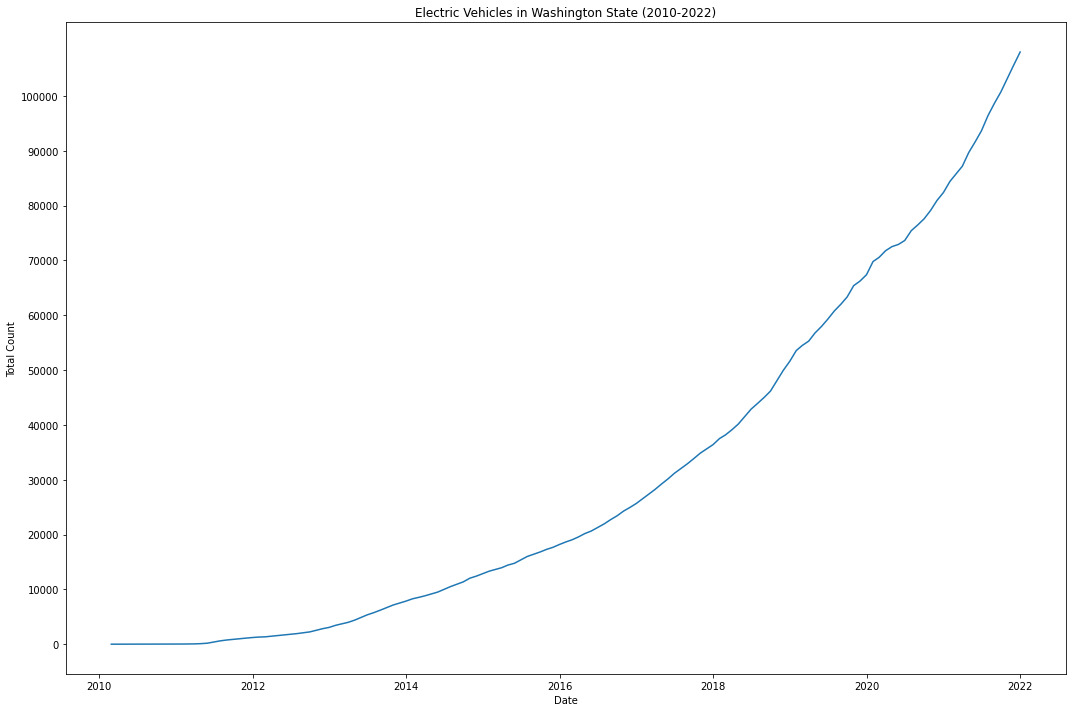

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='DOL Transaction Date', y='State Total', data=df2, ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Total Count')
ax.set_title('Electric Vehicles in Washington State (2010-2022)')
ax.set_yticks(range(0,110000,10000))
plt.tight_layout()

In [ ]:
top_counties = ['King', 'Snohomish', 'Pierce', 'Clark', 'Thurston']

In [ ]:
df2 = df2.loc[:, ['DOL Transaction Date', *top_counties]]
df2.head()

,DOL Transaction Date,King,Snohomish,Pierce,Clark,Thurston
0,2010-02-28,0.0,0.0,0.0,0.0,0.0
1,2010-03-31,1.0,0.0,0.0,1.0,0.0
2,2010-04-30,2.0,0.0,0.0,1.0,0.0
3,2010-05-31,2.0,1.0,0.0,1.0,1.0
4,2010-06-30,3.0,1.0,0.0,1.0,1.0


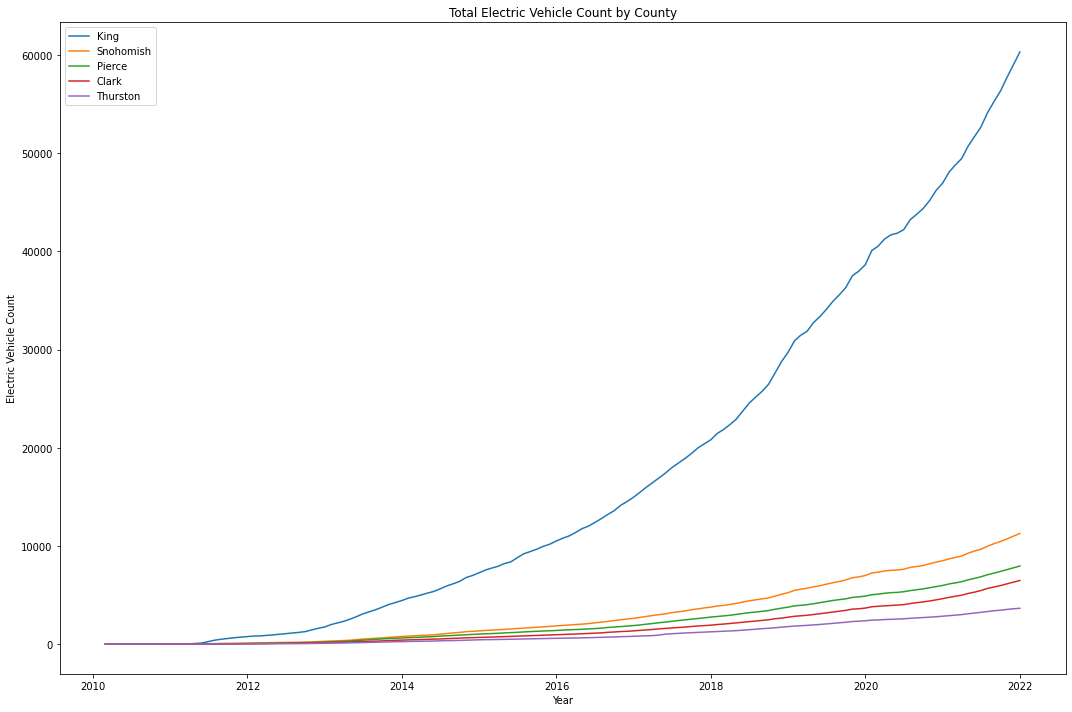

In [ ]:
#plotting county trends
fig, ax = plt.subplots(figsize=(15,10))
for county in top_counties:
    sns.lineplot(x='DOL Transaction Date', y=county, data=df2, ax=ax, 
                 label=county)
ax.set_xlabel('Year')
ax.set_ylabel('Electric Vehicle Count')
ax.set_title('Total Electric Vehicle Count by County')
ax.legend()
# df_cumsum.plot()
plt.tight_layout();

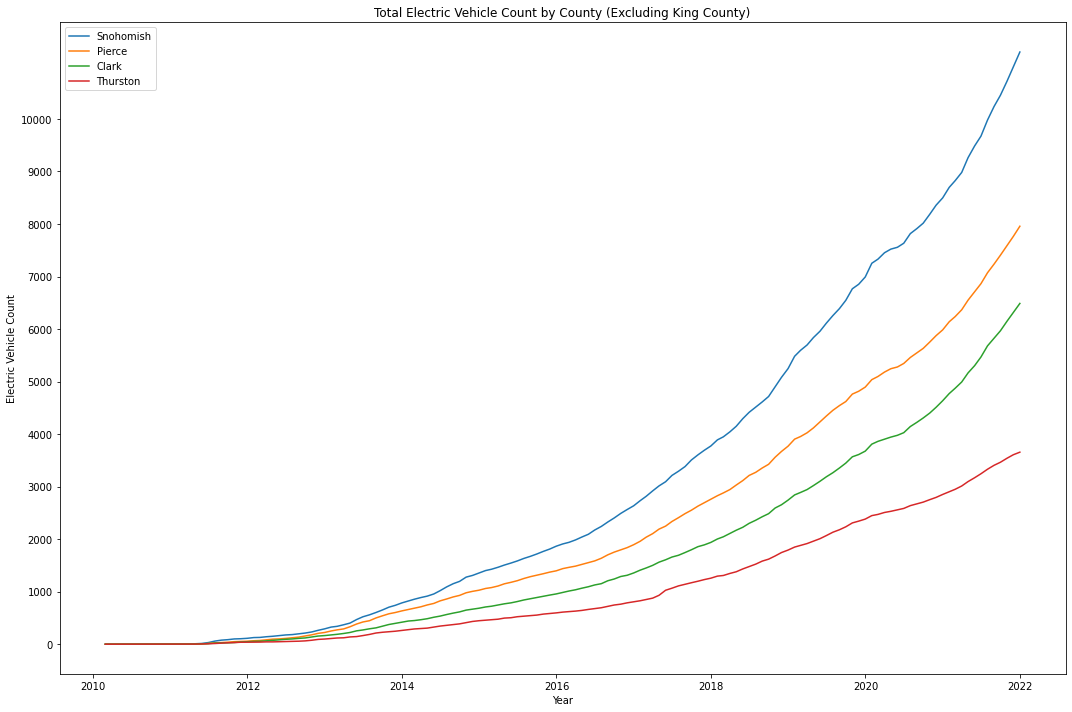

In [ ]:
#plotting county trends except for King County
top_counties.remove('King')

fig, ax = plt.subplots(figsize=(15,10))
for county in top_counties:
    sns.lineplot(x='DOL Transaction Date', y=county, data=df2, ax=ax, 
                 label=county)
ax.set_xlabel('Year')
ax.set_ylabel('Electric Vehicle Count')
ax.set_title('Total Electric Vehicle Count by County (Excluding King County)')
ax.set_yticks(range(0,11000,1000))
ax.legend()
plt.tight_layout();

In [ ]:
top_counties += ['King']

In [ ]:
df2 = df2.set_index('DOL Transaction Date').resample('M').asfreq()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-28 to 2021-12-31
Freq: M
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   King       143 non-null    float64
 1   Snohomish  143 non-null    float64
 2   Pierce     143 non-null    float64
 3   Clark      143 non-null    float64
 4   Thurston   143 non-null    float64
dtypes: float64(5)
memory usage: 6.7 KB


In [ ]:
#separates datea by county
def separate_data_by_county(county, df):

    df_county = pd.DataFrame(df.loc[:, county])
    df_county.columns=["vehicles"]
    df_county.head()
    return df_county

In [ ]:
#separating data by county and parsing this information to a dictionary
county_information = {}
for county in top_counties:
    county_information[county] = {}
    county_information[county]['df']=separate_data_by_county(county, df2)

In [ ]:
#separating data by county and parsing this information to a dictionary
county_dfs = {}
for county in top_counties:
    county_dfs[county] = separate_data_by_county(county, df2)

In [ ]:
#Function returns the model summary and diagnostics information to aid the evaluation of the given model's performance.

def evaluate_model(model):
  
    display(model.summary())
    model.plot_diagnostics()
    plt.tight_layout();

In [ ]:
#Function gets forecasted values from a given model and plots them for visual inspection. The length of the forecasts are dependent on the length of the test data. 
def get_forecast(model, train_data, test_data, plot=True):
  

    #creating a df with the forecast information
    forecast_df = model.get_forecast(steps=len(test_data)).conf_int()
    forecast_df.columns = ['Lower Confidence Interval', 
                              'Upper Confidence Interval']
    forecast_df['Forecasts'] = model.get_forecast(steps=len(test_data))\
    .predicted_mean
    #plotting
    if plot==True:
        with plt.style.context('seaborn-whitegrid'):
            fig, ax = plt.subplots(figsize=(15, 10))
            sns.lineplot(data=train_data, color='black', ax=ax)
            sns.lineplot(data=forecast_df, x=forecast_df.index, 
                         y='Forecasts', color='blue', ax=ax, 
                         label='Forecasted Data', ls='--')
            sns.lineplot(data=test_data, color='purple', ax=ax, 
                         label='Actual Data', ls='-.')
            ax.fill_between(forecast_df.index, 
                            y1=forecast_df['Lower Confidence Interval'], 
                            y2=forecast_df['Upper Confidence Interval'],
                            color = 'green', alpha=0.3, 
                            label='Confidence Interval')
            ax.set_xlabel('Year')
            ax.legend(loc=2)
            plt.show();
    return forecast_df

In [116]:
#Function gets predicted values from a given model and plots them for visual inspection. 
#The length of the predictions are dependent on the length of the test data. 
#The forecasted values are returned in a DataFrame format.

def get_prediction(model, df, test_data, county_name, plot=True):
    
    #creating a df with the prediction information
    prediction_df = model.get_forecast(steps=len(test_data)).conf_int()
    prediction_df.columns = ['Lower Confidence Interval', 
                              'Upper Confidence Interval']
    prediction_df['Predictions'] = model.get_forecast(steps=len(test_data))\
    .predicted_mean
    #plotting
    if plot==True:
        with plt.style.context('seaborn-whitegrid'):
            fig, ax = plt.subplots(figsize=(15, 10))
            sns.lineplot(data=df, ax=ax)
            sns.lineplot(data=prediction_df, x=prediction_df.index, 
                         y='Predictions', color='orange', ax=ax, 
                         label='Predicted Data', ls='--')
            ax.fill_between(prediction_df.index, 
                            y1=prediction_df['Lower Confidence Interval'], 
                            y2=prediction_df['Upper Confidence Interval'],
                            color = 'green', alpha=0.3, 
                            label='Confidence Interval')
            ax.set_xlabel('Year')
            ax.set_ylabel('Electric Vehicles on the Road')
            ax.set_title(f'Predicted Electric Vehicle Count for {county_name}')
            plt.show();
    return prediction_df

In [ ]:
#function to create test train split
def train_test_split_ts (df, train_size, test_size):

    train_end_idx = int(round(len(df)*train_size,0))
    train_set = df.iloc[0:train_end_idx,:]["vehicles"]
    test_set = df.iloc[train_end_idx:,:]["vehicles"]
    return train_set, test_set

In [ ]:
#function to plot test train split
def plot_train_test_split(train_data, test_data, county):
    
    train_data.plot(label='Train Data')
    test_data.plot(label='Test Data')
    ax=plt.gca()
    ax.set_xlabel('Year')
    ax.set_ylabel('Vehicles')
    ax.set_title(f'Vehicles in {county} County')
    ax.legend();

## King County

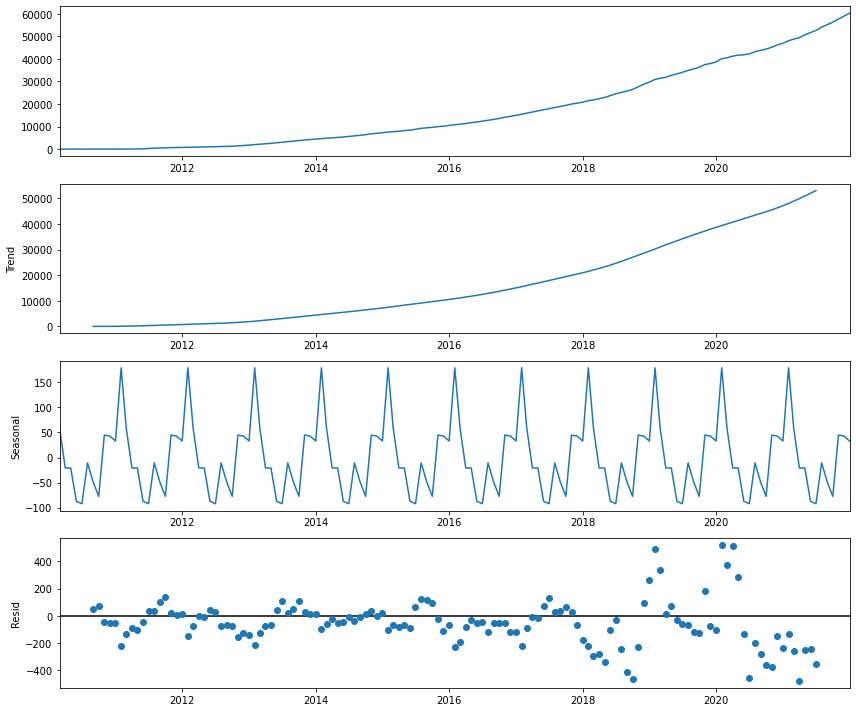

In [ ]:
plt.rcParams['figure.figsize']=(12,10)
decomp = tsa.seasonal_decompose(county_information['King']['df'])
decomp.plot();

In [ ]:
#augmented dickey-fuller test to confirm that the data is stationary
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(county_information['King']['df'])

(0.99, True)

In [ ]:
#splitting dataset into train and test sets for validation
train_king, test_king = train_test_split_ts(county_information['King']['df'], 
                                            0.85, 0.15)

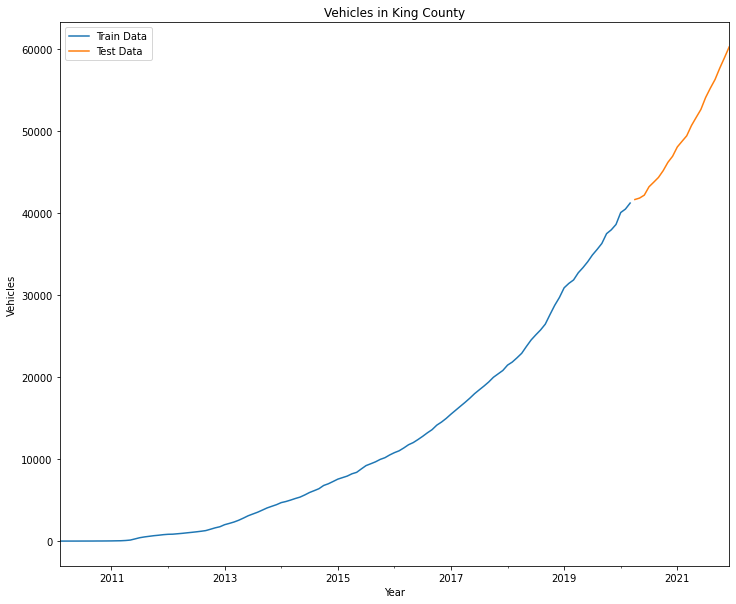

In [ ]:
#plotting the split
plot_train_test_split(train_king, test_king, 'King')

In [ ]:
auto_model = pm.auto_arima(train_king, start_p=0, d=1, start_q=0, max_p=4, 
                           max_q=4, start_P=0, start_Q=0, max_P=3, 
                           max_D=3, max_Q=3, m=12)
auto_model.summary()

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(2,1,0)(2,1,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 709, in fit
    skip_hessian=True, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py", line

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  122
Model:             SARIMAX(4, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -681.083
Date:                              Wed, 06 Apr 2022   AIC                           1376.165
Time:                                      14:21:40   BIC                           1395.005
Sample:                                           0   HQIC                          1383.805
                                              - 122                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     43.2083     14.472      2.986      0.003      14.844      71.572
ar.L1          0.3887      0.068      5.689      0.000       0.255       0.523
ar.L2         -0.0111      0.083     -0.134      0.894      -0.174       0.152
ar.L3          0.4504      0.079      5.692      0.000       0.295       0.606
ar.L4         -0.3130      0.094     -3.339      0.001      -0.497      -0.129
ma.S.L12      -0.5129      0.095     -5.415      0.000      -0.699      -0.327
sigma2      1.505e+04   1439.051     10.456      0.000    1.22e+04    1.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               144.73
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):              17.76   Skew:                             0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             vehicles   No. Observations:                  122
Model:             SARIMAX(4, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -609.547
Date:                              Wed, 06 Apr 2022   AIC                           1231.094
Time:                                      14:21:59   BIC                           1246.480
Sample:                                  02-28-2010   HQIC                          1237.313
                                       - 03-31-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4655      0.074      6.293      0.000       0.321       0.611
ar.L2          0.0858      0.086      0.994      0.320      -0.083       0.255
ar.L3          0.5566      0.090      6.217      0.000       0.381       0.732
ar.L4         -0.2202      0.114     -1.928      0.054      -0.444       0.004
ma.S.L12      -0.5552      0.103     -5.412      0.000      -0.756      -0.354
sigma2      1.886e+04   1608.574     11.722      0.000    1.57e+04     2.2e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               100.35
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):              19.84   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

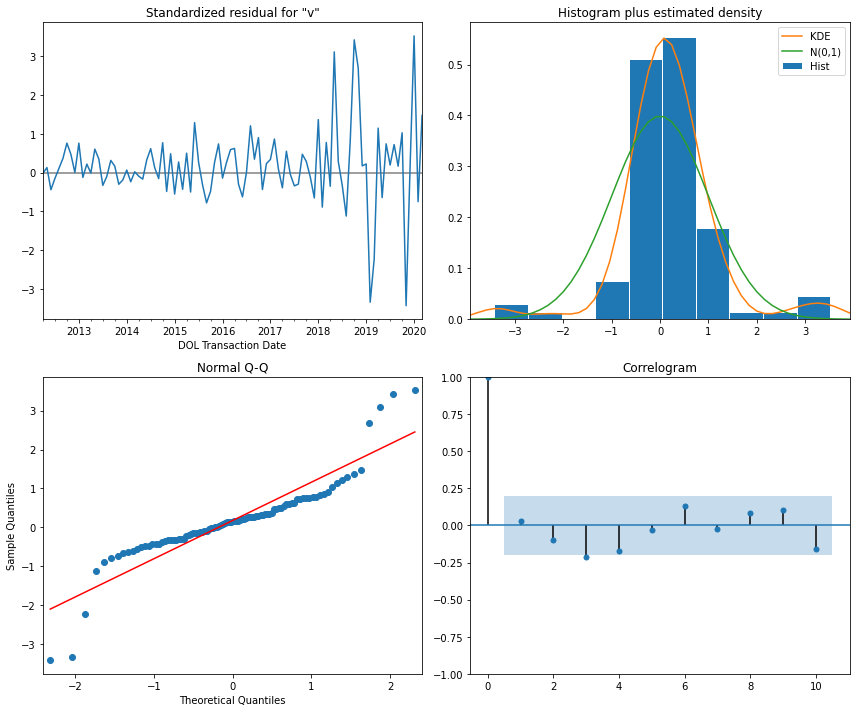

In [ ]:
model = SARIMAX(train_king, order=(4,1,0), 
                seasonal_order=(0,1,[1],12), enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

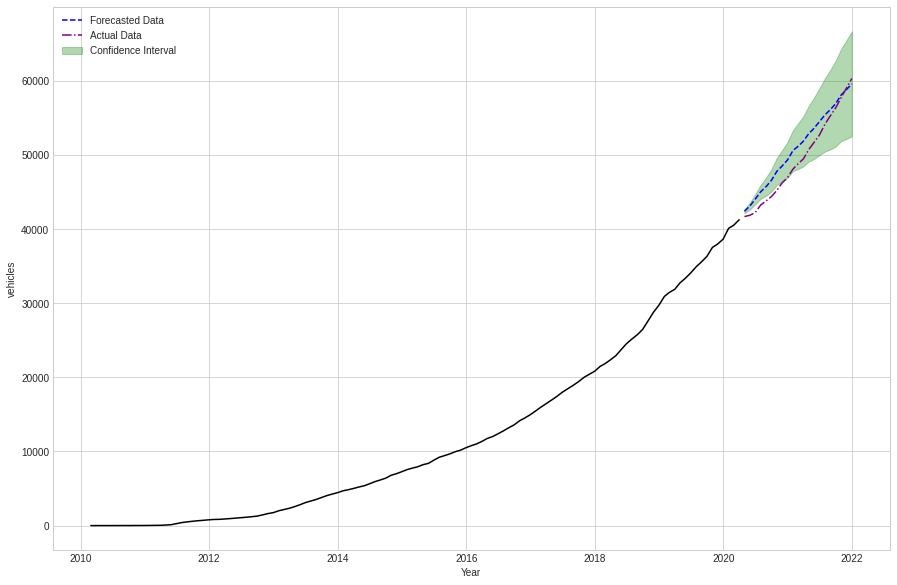

In [ ]:
df_king_forecast = get_forecast(model, train_king, test_king, plot=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             vehicles   No. Observations:                  143
Model:             SARIMAX(4, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -768.937
Date:                              Wed, 06 Apr 2022   AIC                           1549.873
Time:                                      14:28:46   BIC                           1566.447
Sample:                                  02-28-2010   HQIC                          1556.602
                                       - 12-31-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4239      0.072      5.923      0.000       0.284       0.564
ar.L2          0.1679      0.081      2.076      0.038       0.009       0.326
ar.L3          0.2973      0.066      4.482      0.000       0.167       0.427
ar.L4          0.0529      0.055      0.965      0.335      -0.055       0.160
ma.S.L12      -0.6808      0.078     -8.721      0.000      -0.834      -0.528
sigma2      2.917e+04   2559.138     11.400      0.000    2.42e+04    3.42e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                77.74
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):              25.18   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

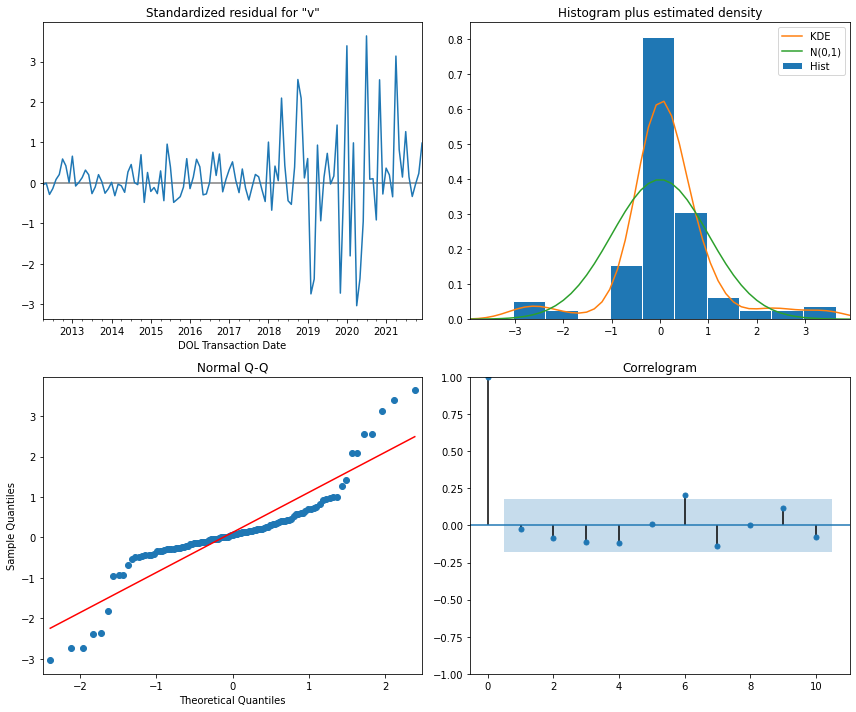

In [ ]:
model = SARIMAX(county_information['King']['df'], order=(4,1,0), 
                seasonal_order=(0,1,[1],12), enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

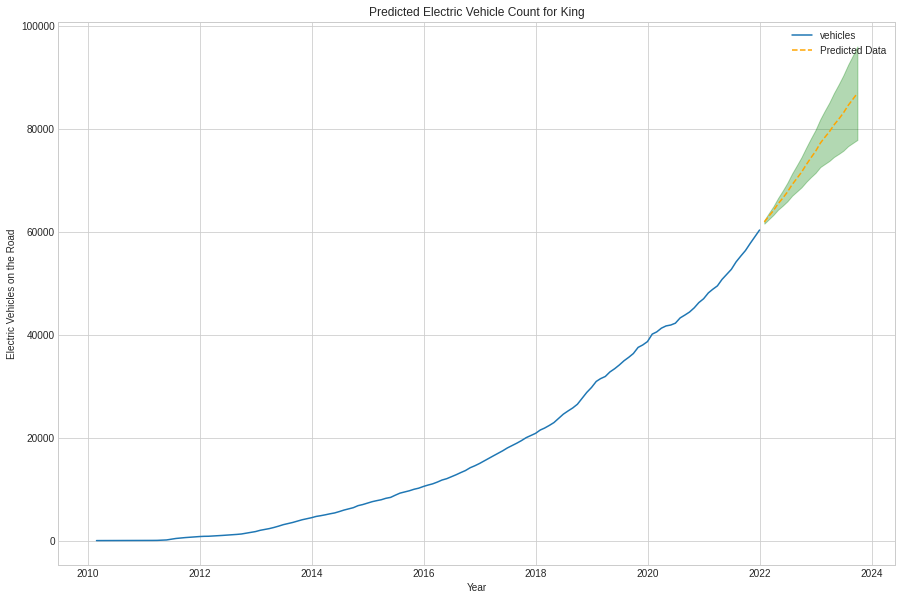

In [ ]:
#creating a df of predictions and plotting
df_king_preds = get_prediction(model, county_information['King']['df'], 
                               test_king, 'King', plot=True)

## Snohomish County

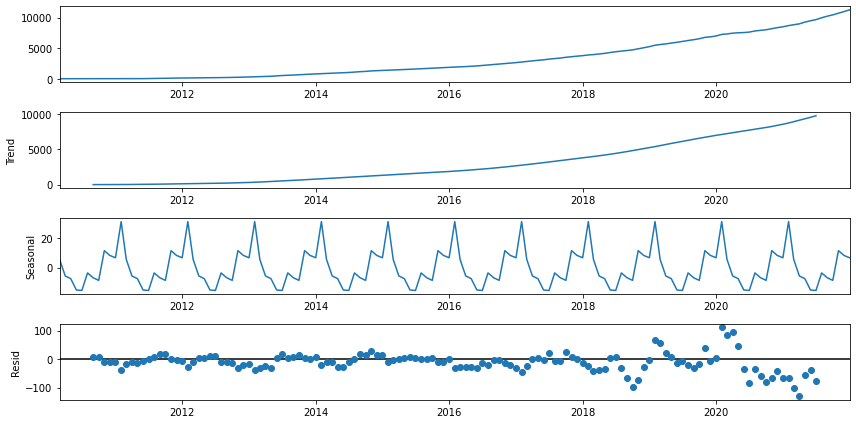

In [ ]:
plt.rcParams['figure.figsize']=(12,6)
decomp = tsa.seasonal_decompose(county_information['Snohomish']['df'])
decomp.plot();

In [ ]:
#augmented dickey-fuller test to confirm that the data is stationary
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(county_information['Snohomish']['df'])

(0.99, True)

In [ ]:
#splitting dataset into train and test sets for validation
train_sno, test_sno = train_test_split_ts(county_information['Snohomish']['df'],
                                          0.85, 0.15)

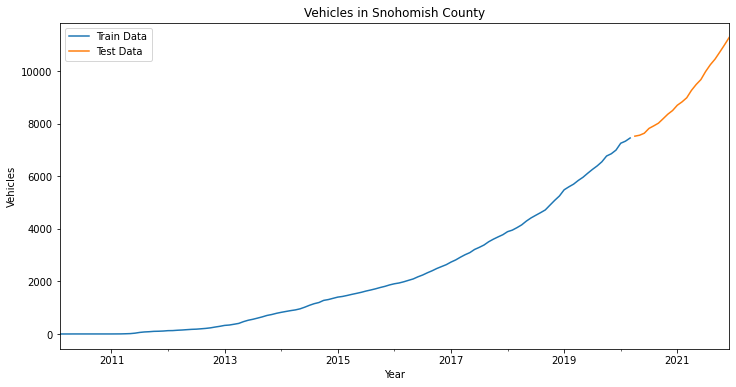

In [ ]:
#plotting train and test sets
plot_train_test_split(train_sno, test_sno, 'Snohomish')

In [ ]:
#finding best parameters
auto_model = pm.auto_arima(train_sno, start_p=0, d=0, start_q=0, max_p=4, 
                           max_q=4, start_P=0, start_Q=0, max_P=3, 
                           max_D=3, max_Q=3, m=12)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  122
Model:             SARIMAX(1, 0, 4)x(2, 0, [], 12)   Log Likelihood                -574.767
Date:                             Wed, 06 Apr 2022   AIC                           1165.534
Time:                                     15:14:31   BIC                           1187.966
Sample:                                          0   HQIC                          1174.645
                                             - 122                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9994      0.001    716.459      0.000       0.997       1.002
ma.L1          0.6038      0.070      8.574      0.000       0.466       0.742
ma.L2          0.4179      0.069      6.060      0.000       0.283       0.553
ma.L3          0.6046      0.096      6.289      0.000       0.416       0.793
ma.L4          0.2746      0.067      4.080      0.000       0.143       0.406
ar.S.L12       0.6656      0.092      7.213      0.000       0.485       0.846
ar.S.L24       0.1864      0.146      1.275      0.202      -0.100       0.473
sigma2       574.8463     60.455      9.509      0.000     456.358     693.335
===================================================================================
Ljung-Box (L1) (Q):                   1.76   Jarque-Bera (JB):               177.89
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):              13.54   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            vehicles   No. Observations:                  122
Model:             SARIMAX(1, 0, 4)x(2, 0, [], 12)   Log Likelihood                -445.306
Date:                             Wed, 06 Apr 2022   AIC                            906.613
Time:                                     15:16:27   BIC                            927.211
Sample:                                 02-28-2010   HQIC                           914.942
                                      - 03-31-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0174      0.007    141.127      0.000       1.003       1.032
ma.L1          0.3754      0.125      3.000      0.003       0.130       0.621
ma.L2          0.2691      0.105      2.554      0.011       0.063       0.476
ma.L3          0.3391      0.119      2.859      0.004       0.107       0.572
ma.L4         -0.0437      0.100     -0.438      0.662      -0.240       0.152
ar.S.L12       0.5746      0.138      4.179      0.000       0.305       0.844
ar.S.L24       0.5084      0.246      2.064      0.039       0.026       0.991
sigma2       605.5873     79.459      7.621      0.000     449.850     761.325
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                67.56
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               4.79   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

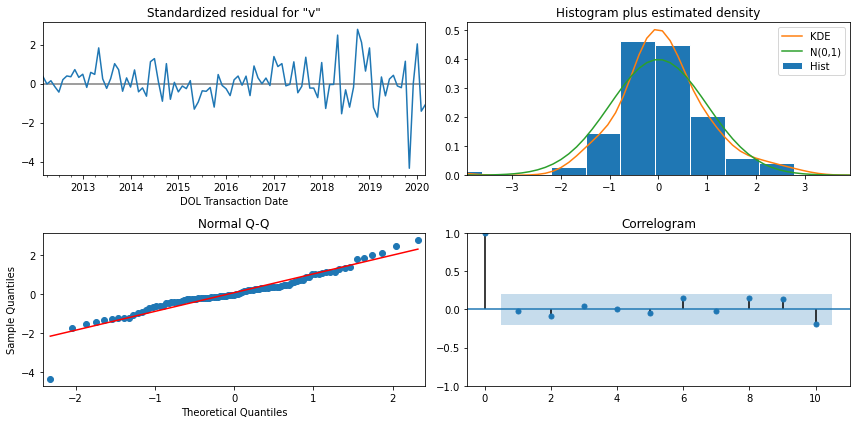

In [ ]:
#fitting SARIMAX model with best params
model = SARIMAX(train_sno, order=(1,0,4), seasonal_order=(2,0,[],12), 
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

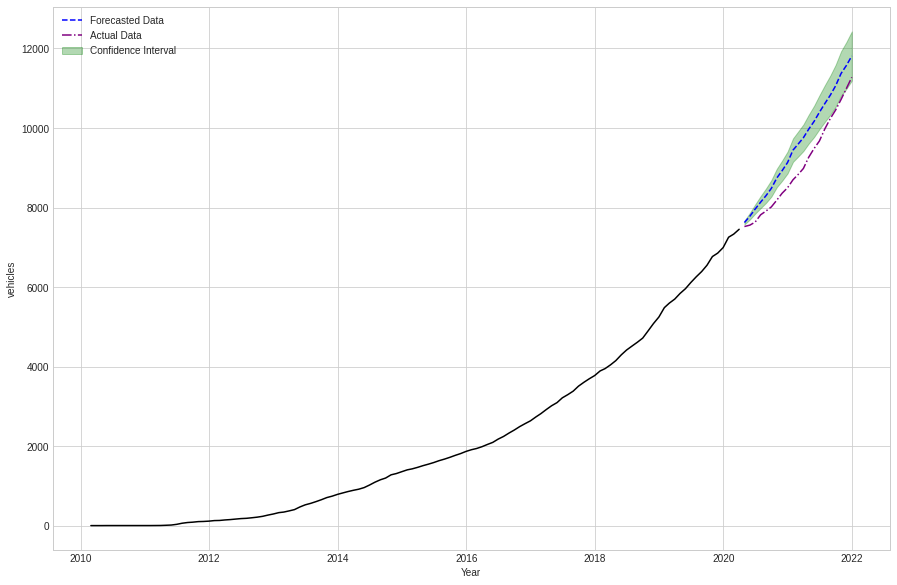

In [ ]:
df_sno_forecast = get_forecast(model, train_sno, test_sno, plot=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            vehicles   No. Observations:                  143
Model:             SARIMAX(1, 0, 4)x(2, 0, [], 12)   Log Likelihood                -576.237
Date:                             Wed, 06 Apr 2022   AIC                           1168.473
Time:                                     15:21:47   BIC                           1190.639
Sample:                                 02-28-2010   HQIC                          1177.473
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0226      0.002    571.163      0.000       1.019       1.026
ma.L1          0.4307      0.093      4.609      0.000       0.248       0.614
ma.L2          0.1592      0.093      1.721      0.085      -0.022       0.341
ma.L3          0.3663      0.071      5.152      0.000       0.227       0.506
ma.L4          0.1936      0.088      2.208      0.027       0.022       0.365
ar.S.L12       0.2227      0.075      2.964      0.003       0.075       0.370
ar.S.L24       0.2342      0.170      1.376      0.169      -0.099       0.568
sigma2      1157.8019    129.070      8.970      0.000     904.830    1410.774
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                53.99
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              11.06   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

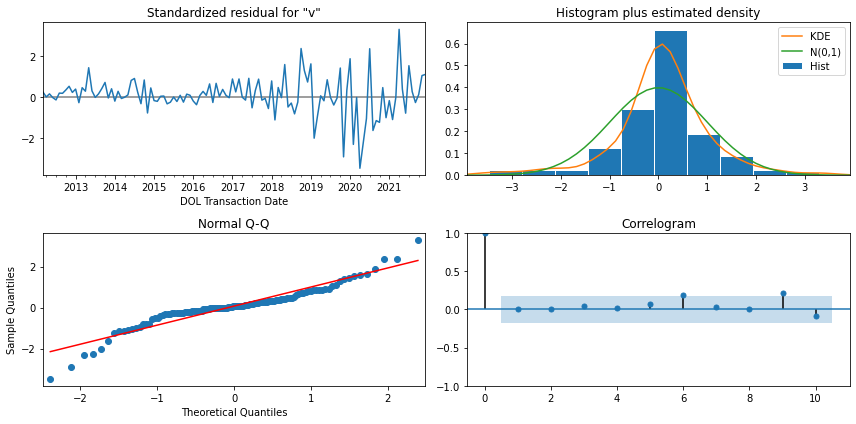

In [ ]:
model = SARIMAX(county_information['Snohomish']['df'], order=(1,0,4), 
                seasonal_order=(2,0,[],12), enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

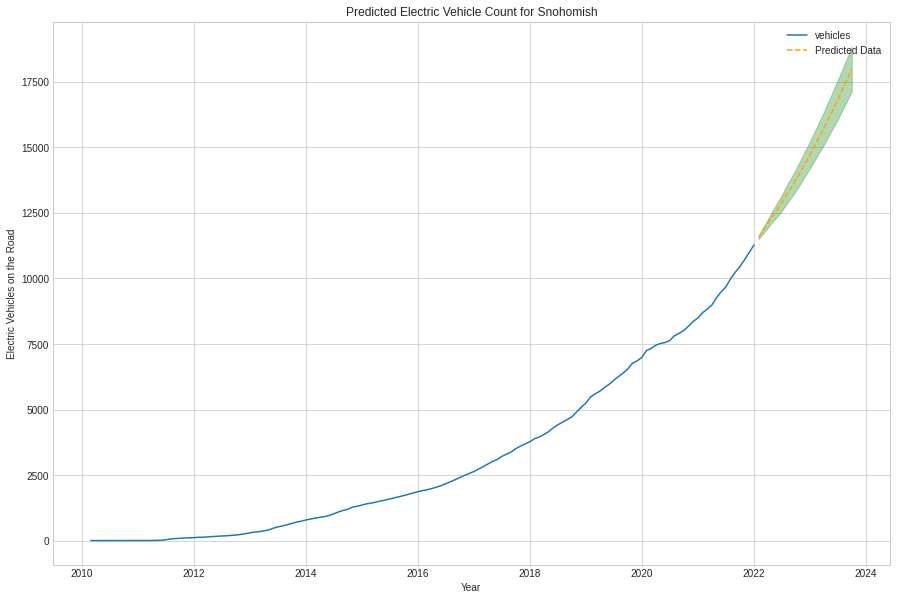

In [ ]:
#getting and plotting predictions
df_sno_preds = get_prediction(model, county_information['Snohomish']['df'], 
                               test_sno, 'Snohomish', plot=True)

## Pierce County

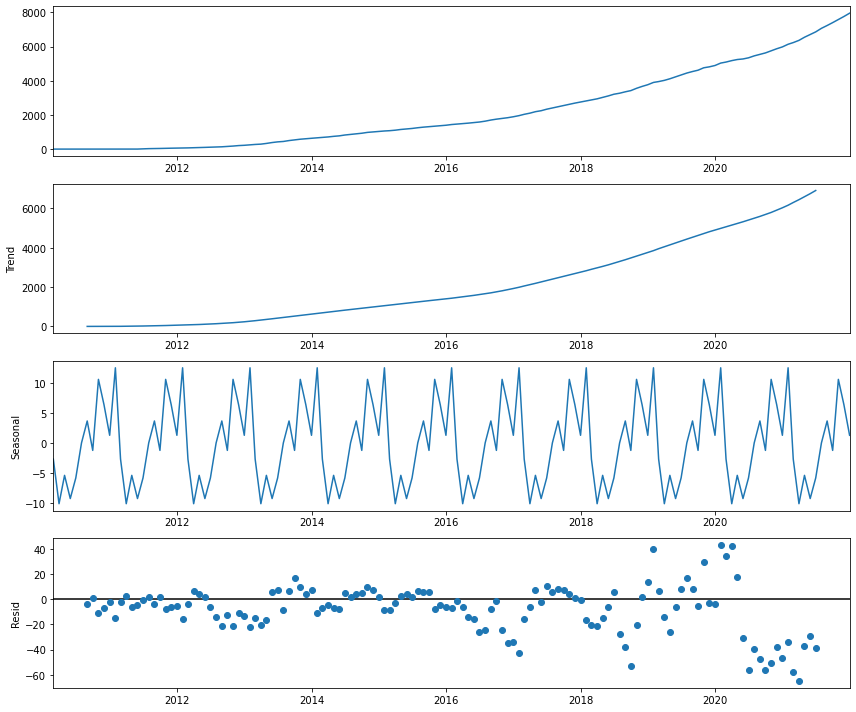

In [ ]:
plt.rcParams['figure.figsize']=(12,10)
decomp = tsa.seasonal_decompose(county_information['Pierce']['df'])
decomp.plot();

In [ ]:
#augmented dickey-fuller test to confirm that the data is stationary
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(county_information['Pierce']['df'])

(0.99, True)

In [ ]:
#splitting dataset into train and test sets for validation
train_pierce, test_pierce = train_test_split_ts(county_information['Pierce']['df'], 
                                            0.85, 0.15)

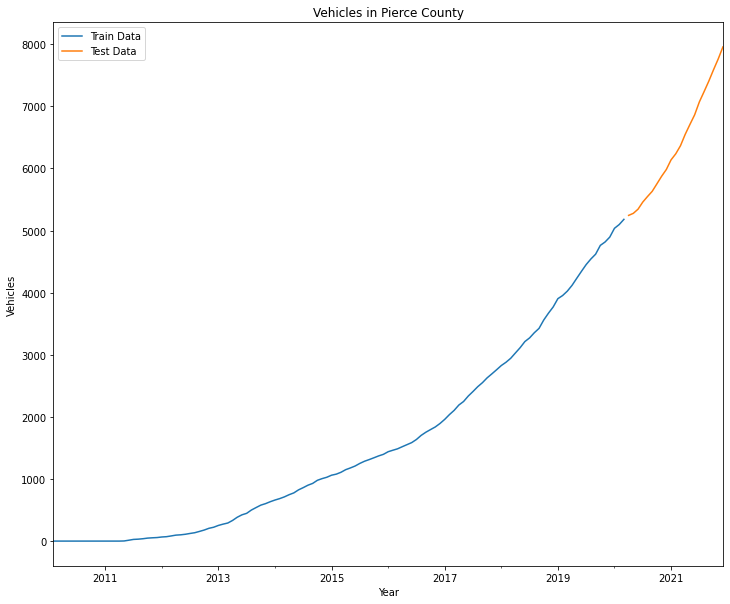

In [ ]:
#plotting train and test sets
plot_train_test_split(train_pierce, test_pierce, 'Pierce')

In [ ]:
auto_model = pm.auto_arima(train_pierce, start_p=0, start_q=0, d=1, max_p=4, 
                           max_q=4, max_P=5, max_Q=5, start_P=0, start_Q=0, 
                           m=12)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  122
Model:             SARIMAX(3, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -499.498
Date:                              Wed, 06 Apr 2022   AIC                           1010.995
Time:                                      19:14:35   BIC                           1027.770
Sample:                                           0   HQIC                          1017.808
                                              - 122                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.1019      3.769      1.088      0.276      -3.285      11.489
ar.L1          0.3778      0.085      4.434      0.000       0.211       0.545
ar.L2          0.2072      0.093      2.235      0.025       0.025       0.389
ar.L3          0.3183      0.075      4.229      0.000       0.171       0.466
ma.S.L12       0.5821      0.073      7.960      0.000       0.439       0.725
sigma2       212.7505     19.057     11.164      0.000     175.399     250.102
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                78.00
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               9.59   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             vehicles   No. Observations:                  122
Model:             SARIMAX(3, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -451.406
Date:                              Wed, 06 Apr 2022   AIC                            912.811
Time:                                      19:47:24   BIC                            926.222
Sample:                                  02-28-2010   HQIC                           918.249
                                       - 03-31-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3977      0.094      4.226      0.000       0.213       0.582
ar.L2          0.2254      0.100      2.256      0.024       0.030       0.421
ar.L3          0.3517      0.087      4.056      0.000       0.182       0.522
ma.S.L12       0.5897      0.082      7.228      0.000       0.430       0.750
sigma2       239.0803     23.461     10.190      0.000     193.097     285.064
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                64.51
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               6.39   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

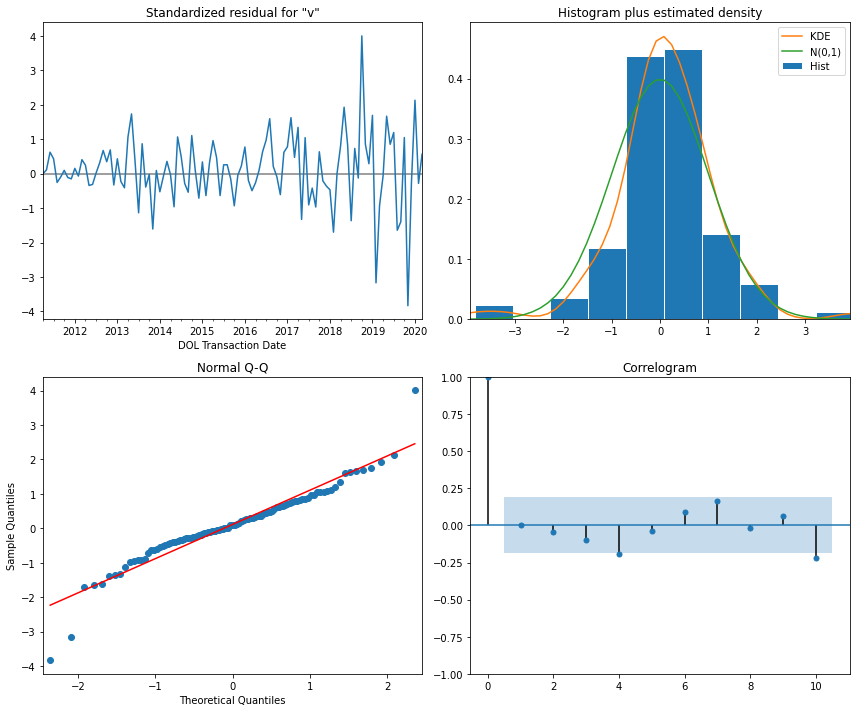

In [ ]:
#fitting SARIMAX model with best params
model = SARIMAX(train_pierce, order=(3,1,0), seasonal_order=(0,0,[1],12), 
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

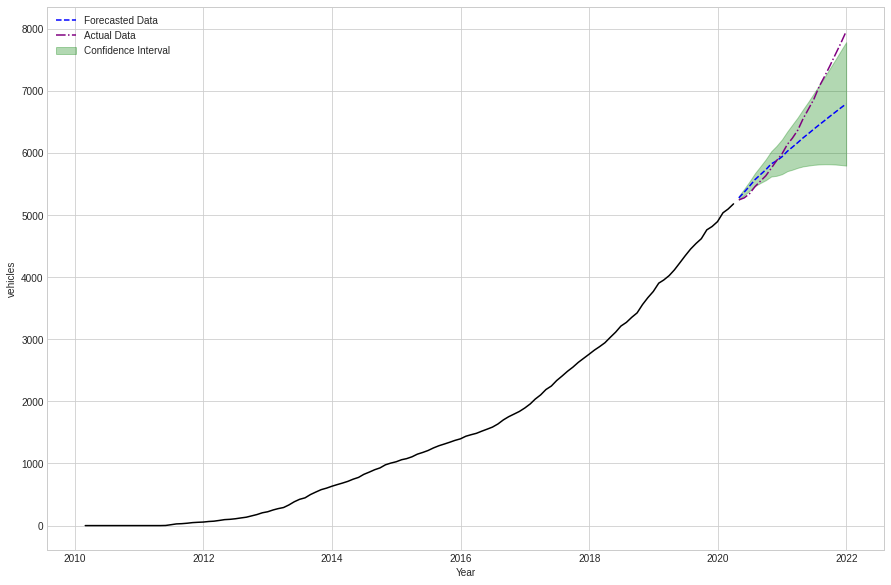

In [ ]:
df_pierce_forecast = get_forecast(model, train_pierce, test_pierce, plot=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             vehicles   No. Observations:                  143
Model:             SARIMAX(3, 1, 0)x(0, 0, [1], 12)   Log Likelihood                -560.006
Date:                              Wed, 06 Apr 2022   AIC                           1130.012
Time:                                      19:47:33   BIC                           1144.312
Sample:                                  02-28-2010   HQIC                          1135.822
                                       - 12-31-2021                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4262      0.080      5.342      0.000       0.270       0.583
ar.L2          0.2162      0.086      2.520      0.012       0.048       0.384
ar.L3          0.3850      0.070      5.502      0.000       0.248       0.522
ma.S.L12       0.2593      0.071      3.636      0.000       0.120       0.399
sigma2       343.2384     29.393     11.678      0.000     285.630     400.847
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                36.06
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               9.55   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

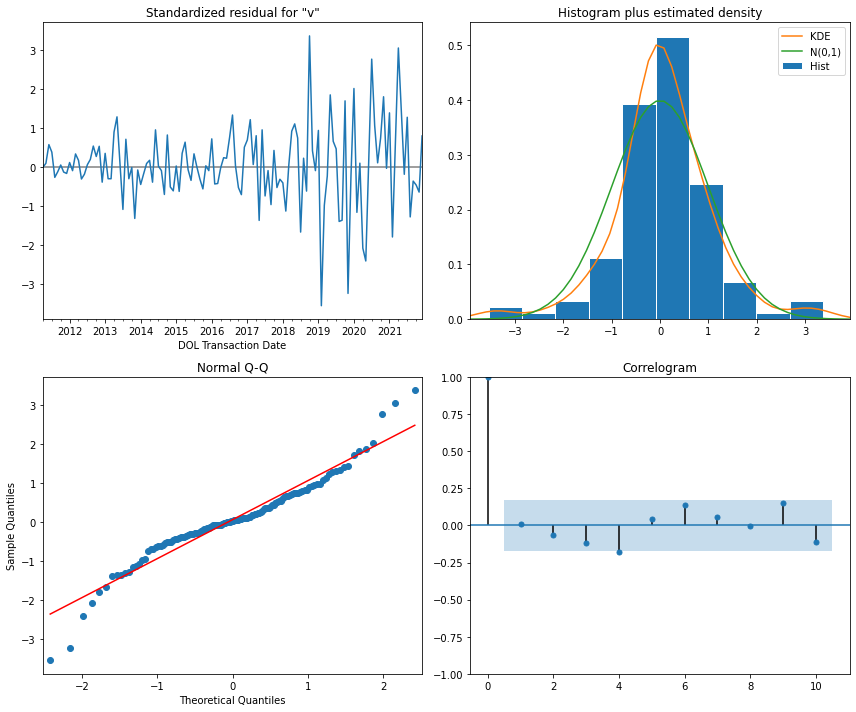

In [ ]:
model = SARIMAX(county_information['Pierce']['df'], order=(3,1,0), 
                seasonal_order=(0,0,[1],12), enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

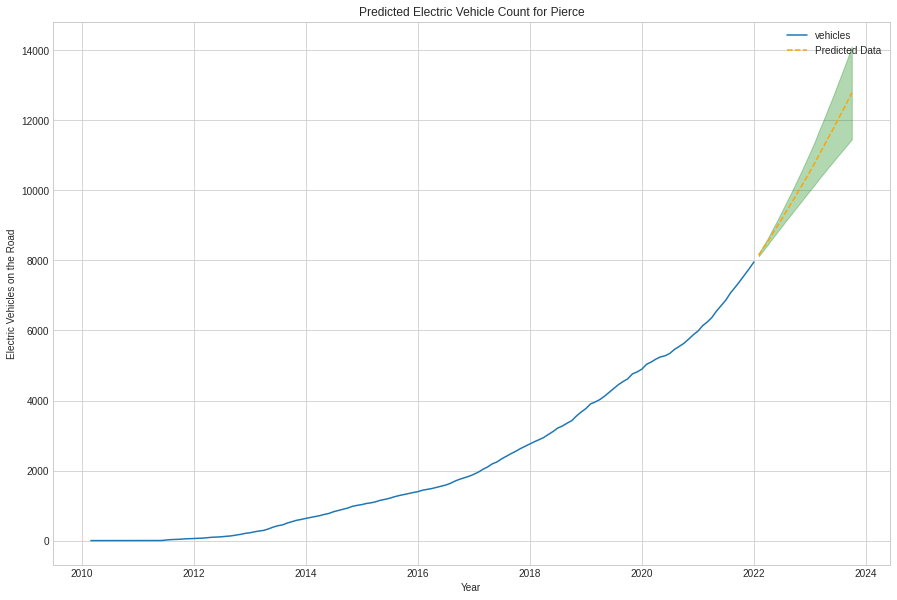

In [ ]:
#getting and plotting predictions
df_pierce_preds = get_prediction(model, county_information['Pierce']['df'], 
                               test_pierce, 'Pierce', plot=True)

## Clark County

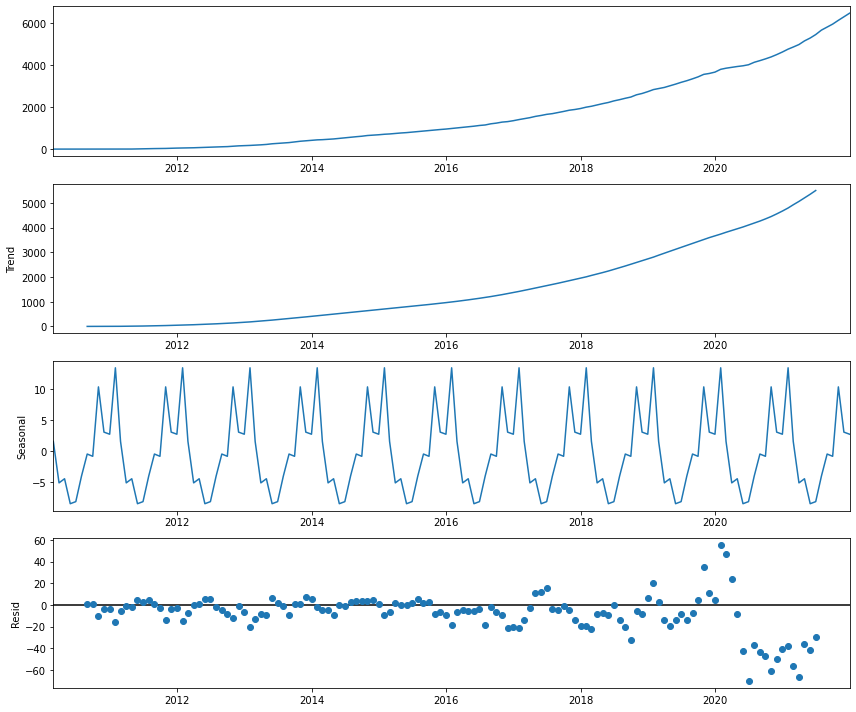

In [ ]:
plt.rcParams['figure.figsize']=(12,10)
decomp = tsa.seasonal_decompose(county_information['Clark']['df'])
decomp.plot();

In [ ]:
#augmented dickey-fuller test to confirm that the data is stationary
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(county_information['Clark']['df'])

(0.99, True)

In [ ]:
#split data into train/test sets for validation
train_clark, test_clark = train_test_split_ts(county_information['Clark']['df'], 
                                            0.80, 0.20)

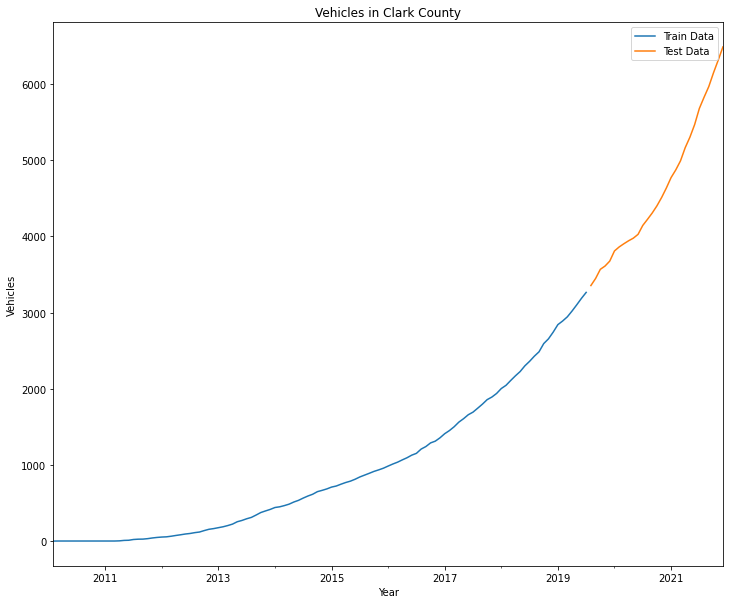

In [ ]:
#plot the split
plot_train_test_split(train_clark, test_clark, 'Clark')

In [ ]:
auto_model = pm.auto_arima(train_clark, start_p=0, start_q=0, d=1, max_p=4, 
                           max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, 
                           m=12)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  114
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -408.987
Date:                             Wed, 06 Apr 2022   AIC                            825.975
Time:                                     19:27:44   BIC                            836.884
Sample:                                          0   HQIC                           830.402
                                             - 114                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9964      0.008    132.855      0.000       0.982       1.011
ma.L1         -0.7298      0.059    -12.266      0.000      -0.846      -0.613
ar.S.L12       0.5466      0.112      4.879      0.000       0.327       0.766
sigma2        75.4005      5.958     12.655      0.000      63.723      87.078
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):               144.45
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):              19.30   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            vehicles   No. Observations:                  114
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -362.628
Date:                             Wed, 06 Apr 2022   AIC                            733.256
Time:                                     19:28:09   BIC                            743.677
Sample:                                 02-28-2010   HQIC                           737.474
                                      - 07-31-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0177      0.009    119.083      0.000       1.001       1.034
ma.L1         -0.8254      0.074    -11.185      0.000      -0.970      -0.681
ar.S.L12       0.5684      0.131      4.330      0.000       0.311       0.826
sigma2        81.7166      7.361     11.102      0.000      67.290      96.143
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                72.08
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.87   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

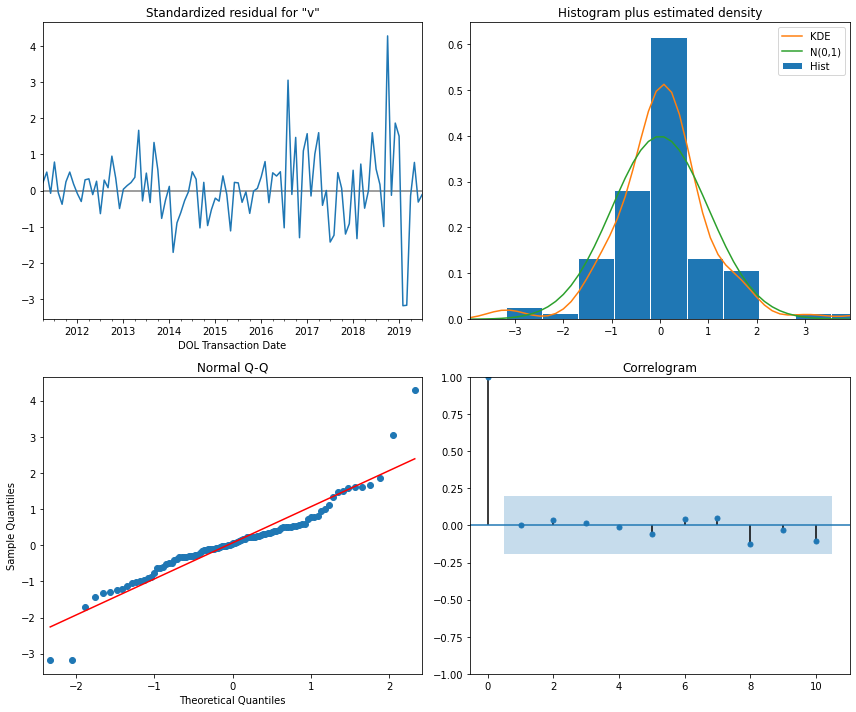

In [ ]:
model = SARIMAX(train_clark, order=(1,1,1), seasonal_order=(1,0,[],12), 
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

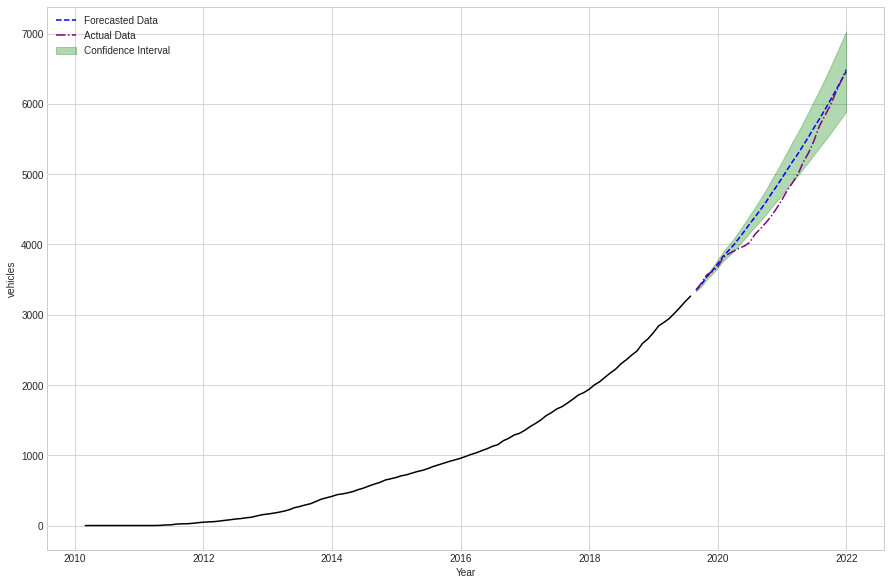

In [ ]:
df_clark_forecast = get_forecast(model, train_clark, test_clark, plot=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            vehicles   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -545.082
Date:                             Wed, 06 Apr 2022   AIC                           1098.164
Time:                                     19:28:33   BIC                           1109.603
Sample:                                 02-28-2010   HQIC                          1102.812
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0177      0.010     99.145      0.000       0.998       1.038
ma.L1         -0.5898      0.056    -10.593      0.000      -0.699      -0.481
ar.S.L12       0.4276      0.064      6.665      0.000       0.302       0.553
sigma2       273.0670     20.292     13.457      0.000     233.295     312.839
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):               129.18
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):              24.31   Skew:                             0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

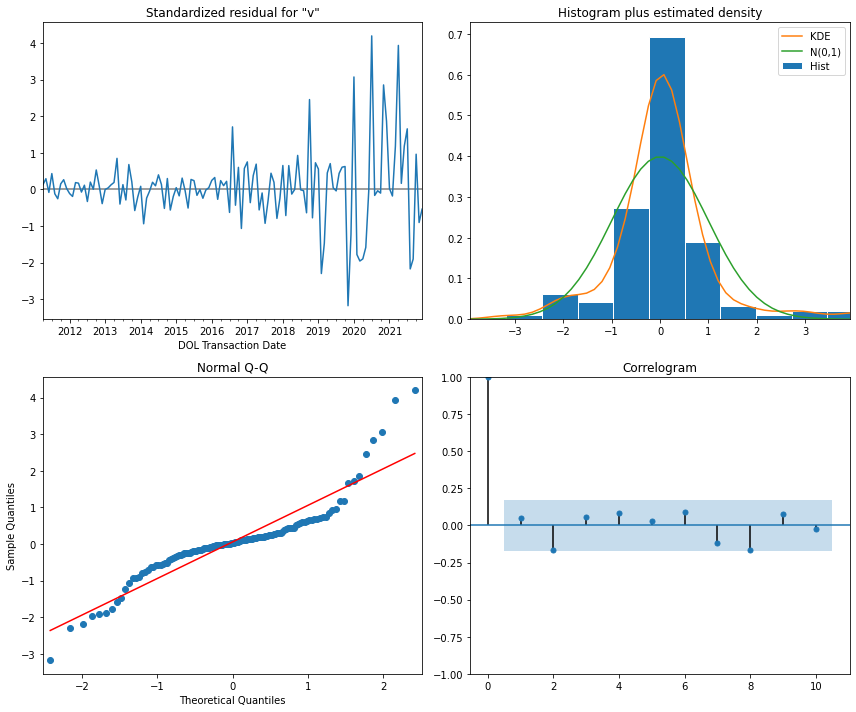

In [ ]:
model = SARIMAX(county_information['Clark']['df'], order=(1,1,1), 
                seasonal_order=(1,0,[],12), enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

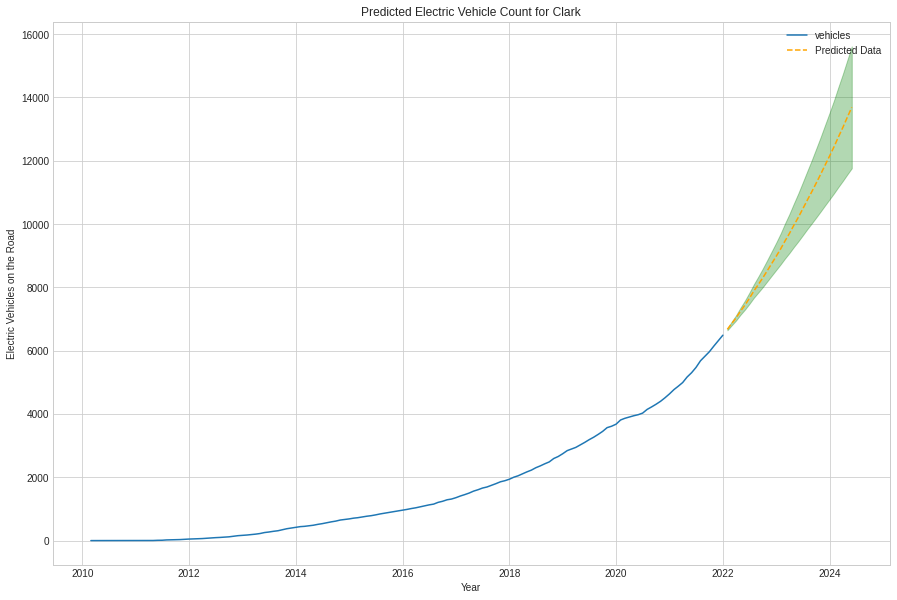

In [ ]:
#getting/plotting predictions
df_clark_preds = get_prediction(model, county_information['Clark']['df'], 
                               test_clark, 'Clark', plot=True)

## Thurston County

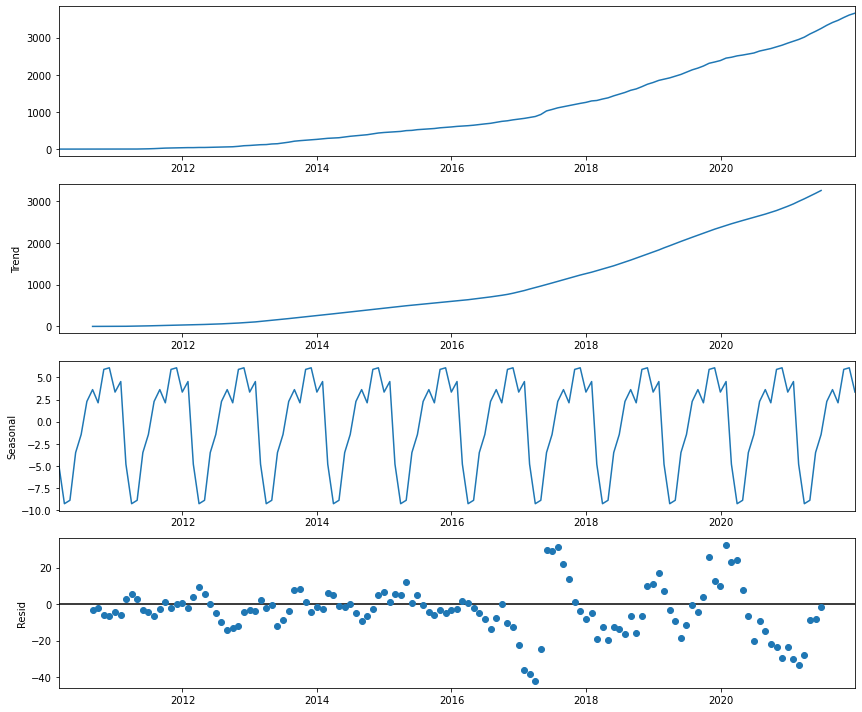

In [ ]:
plt.rcParams['figure.figsize']=(12,10)
decomp = tsa.seasonal_decompose(county_information['Thurston']['df'])
decomp.plot();

In [ ]:
#augmented dickey-fuller test to confirm that the data is stationary
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(county_information['Thurston']['df'])

(0.99, True)

In [ ]:
#splitting data into train/test sets for validation
train_thurston, test_thurston = train_test_split_ts(county_information['Thurston']['df'], 
                                            0.75, 0.25)

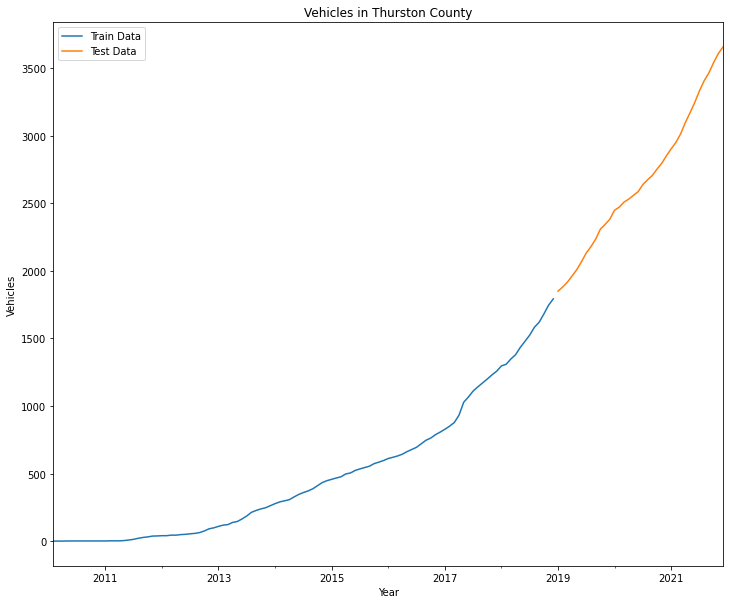

In [ ]:
#plotting the split
plot_train_test_split(train_thurston, test_thurston, 'Thurston')

In [ ]:
#finding best parameters
auto_model = pm.auto_arima(train_thurston, start_p=0, start_q=0, d=1, max_p=4, 
                           max_q=4, max_P=3, max_Q=3, start_P=0, start_Q=0, 
                           m=12)
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  107
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -391.261
Date:                Wed, 06 Apr 2022   AIC                            788.522
Time:                        20:14:18   BIC                            796.512
Sample:                             0   HQIC                           791.760
                                - 107                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9890      0.016     61.148      0.000       0.957       1.021
ma.L1         -0.5322      0.051    -10.465      0.000      -0.632      -0.433
sigma2        91.7719      5.725     16.029      0.000      80.550     102.993
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               727.60
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):              32.00   Skew:                             2.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            vehicles   No. Observations:                  107
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -347.438
Date:                             Wed, 06 Apr 2022   AIC                            702.875
Time:                                     20:14:18   BIC                            713.005
Sample:                                 02-28-2010   HQIC                           706.965
                                      - 12-31-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0092      0.021     48.731      0.000       0.969       1.050
ma.L1         -0.5798      0.061     -9.562      0.000      -0.699      -0.461
ar.S.L12       0.1122      0.099      1.129      0.259      -0.083       0.307
sigma2       102.4791      7.653     13.391      0.000      87.480     117.478
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               437.30
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):              10.08   Skew:                             1.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

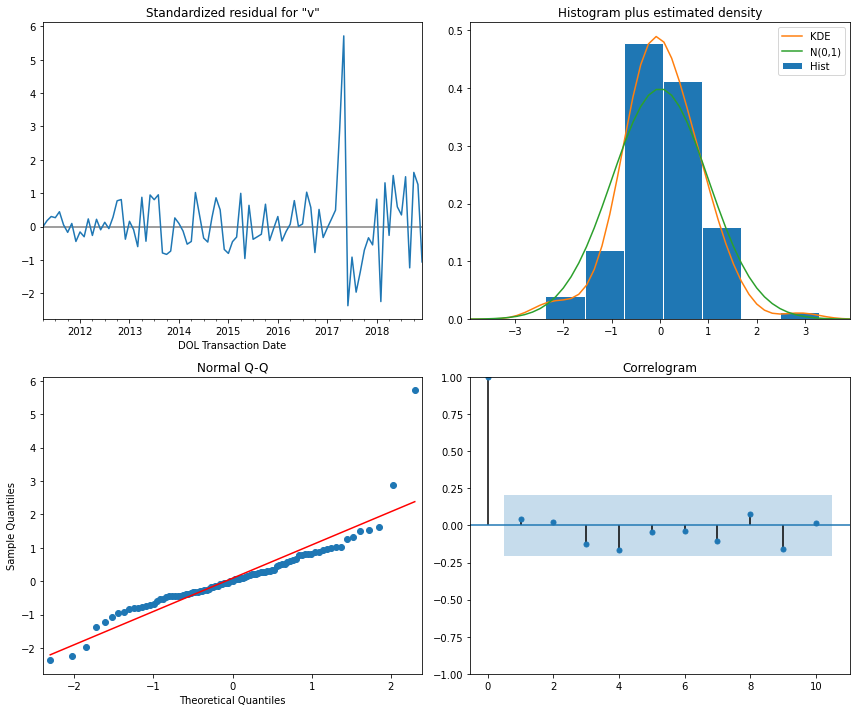

In [ ]:
model = SARIMAX(train_thurston, order=(1,1,1), seasonal_order=(1,0,[],12), 
                enforce_invertibility=False, enforce_stationarity=False).fit()
evaluate_model(model)

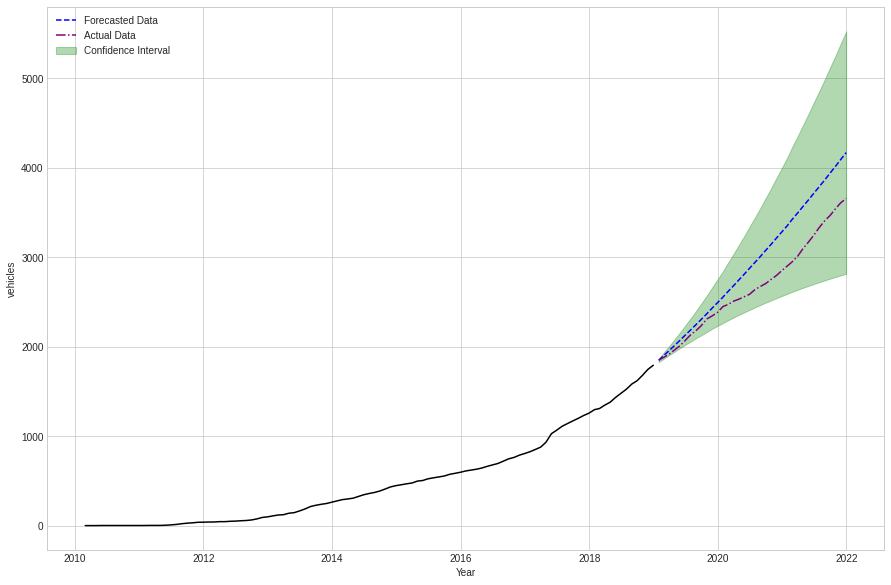

In [ ]:
df_thurston_forecast = get_forecast(model, train_thurston, test_thurston, 
                                    plot=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            vehicles   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -497.179
Date:                             Wed, 06 Apr 2022   AIC                           1002.358
Time:                                     20:14:20   BIC                           1013.797
Sample:                                 02-28-2010   HQIC                          1007.006
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9948      0.015     64.653      0.000       0.965       1.025
ma.L1         -0.5179      0.058     -8.985      0.000      -0.631      -0.405
ar.S.L12       0.1609      0.082      1.968      0.049       0.001       0.321
sigma2       130.0552      9.855     13.197      0.000     110.739     149.371
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               109.73
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               7.10   Skew:                             0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

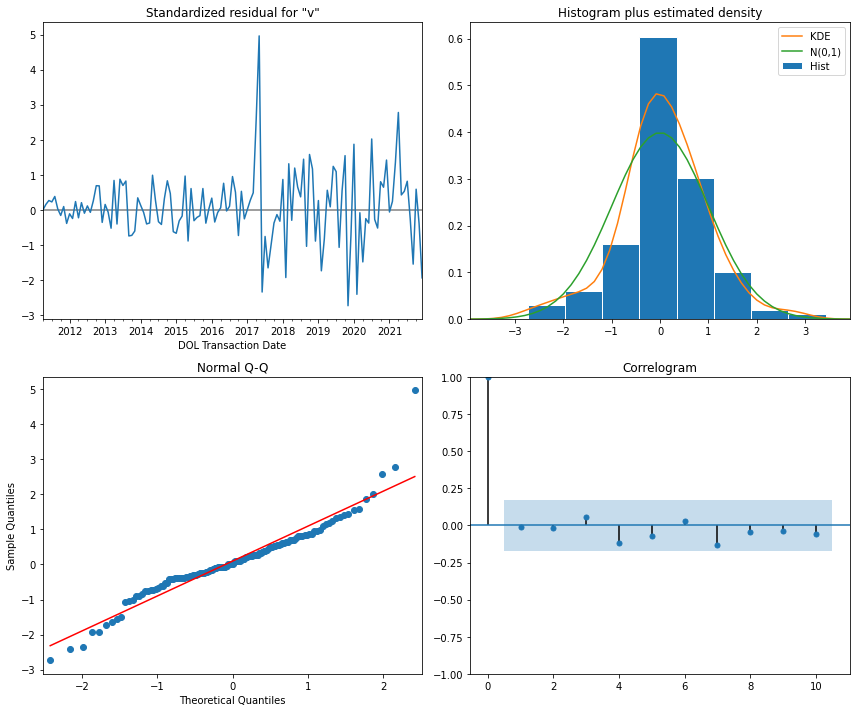

In [ ]:
model = SARIMAX(county_information['Thurston']['df'], order=(1,1,1), 
                seasonal_order=(1,0,[],12), enforce_invertibility=False, 
                enforce_stationarity=False).fit()
evaluate_model(model)

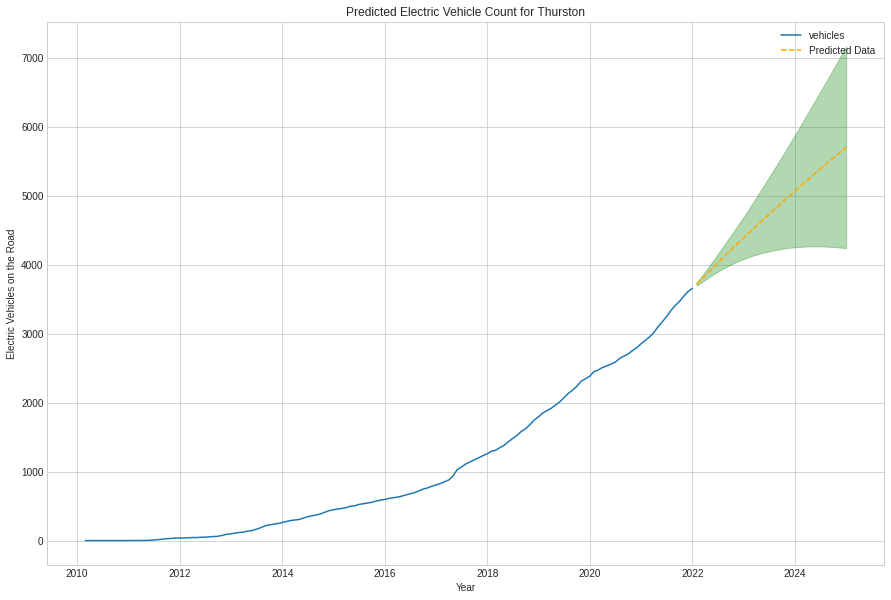

In [ ]:
#getting and plotting predictions
df_thurston_preds = get_prediction(model, county_information['Thurston']['df'], 
                               test_thurston, 'Thurston', plot=True)